# 학습 관련 기술

* 매개변수 갱신
* 가중치의 초깃값
* 배치 정규화
* 바른 학습을 위해
* 하이퍼파라미터 최적화
* 가중치 감소

## 6.1. 매개변수 갱신

신경망 학습의 목적은 손실 함수의 값을 낮추는 매개변수를 찾는것이다. (매개변수의 최적값을 찾는 문제: 최적화)

### 6.1.2. 확률적 경사 하강법(SGD)

매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하는 방법

$$ W \leftarrow W - \eta \frac{\partial L}{\partial W} $$

- W: 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$: W에 대한 손실 함수의 기울기
- $\eta$: 학습률
- $\leftarrow$: 우변의 값으로 좌변의 값을 갱신

In [1]:
# SGD 구현

class SGD:
  """Stochastic Gradient Descent
  
  Description:
    합습률을 인수로 받아 객체를 초기화한다.

  Methods:
    * __init__(lr=0.01): 학습률을 초기화한다.
    * update(params, grads): 매개변수와 기울기를 받아 매개변수를 갱신한다.
  """
  def __init__(self, lr=0.01):
    self.lr = lr
    
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]


초기화 때 받은 인수`lr`은 `learning rage(학습률)`를 뜻한다.

학습률은 인스턴스 변수로 유지한다.

`update(params, grads)` 메서드는 SGD과정에서 반복해서 불린다.

`params`와 `grads`는 딕셔너리 변수로, `params['W1']`, `grads['W1']` 등과 같이 각각 가중치 매개변수와 기울기를 저장한다.

**SGD사용법**
```python
networks = TwoLayerNet(...)
optimizer = SGD(lr=0.01)

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치 획득
    loss = networks.loss(x_batch, t_batch)
    networks.backward()
    optimizer.update(networks.params, networks.grads)
    ...
```

### 6.1.3. SGD의 단점

- 비등방성 함수(방향에 따라 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이다.
- 학습률이 너무 작으면 학습 시간이 길어지고, 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.
- SGD는 단순하고 구현이 쉽지만, 비효율적이다.

함수의 최솟값을 구하는 문제로 볼 때, SGD는 비효율적이다.
$$ f(x, y) = \frac{1}{20}x^2 + y^2 $$

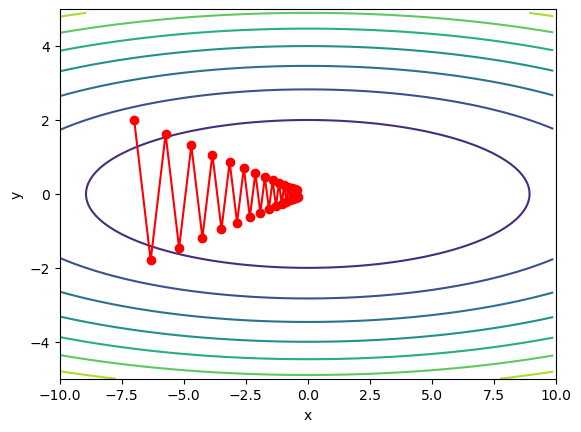

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return x**2 / 20.0 + y**2

def df(x, y):
  return x / 10.0, 2.0*y

x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 5, 0.1)

plt.figure()
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

optimizer = SGD(lr=0.95)
params = {'x': -7.0, 'y': 2.0}
grads = {'x': 0, 'y': 0}
x_history = []
y_history = []
for i in range(30):
  x_history.append(params['x'])
  y_history.append(params['y'])
  grads['x'], grads['y'] = df(params['x'], params['y'])
  optimizer.update(params, grads)
  
plt.plot(x_history, y_history, 'o-', color='red')
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


SGD는 비등방성 함수에서는 탐색 경로가 비효율적이다.

### 6.1.4. 모멘텀

모멘텀은 '운동량'을 뜻하는 단어로, 물리와 관련이 있다. 모뎀텀 기법은 수식으로는 다음과 같다.
$$
v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W}
$$

$$
W \leftarrow W + v
$$

* $W$는 갱신할 가중치 매개변수
* $\frac{\partial L}{\partial W}$는 W에 대한 손실 함수의 기울기
* $\eta$는 학습률
* $v$는 물리에서 말하는 속도에 해당한다.
* $\alpha v$항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.
  


In [3]:
class Momentum:
  """모멘텀
  
  """
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
    
  def update(self, params, grads):
    if(self.v is None):
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
        
    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

Text(0, 0.5, 'y')

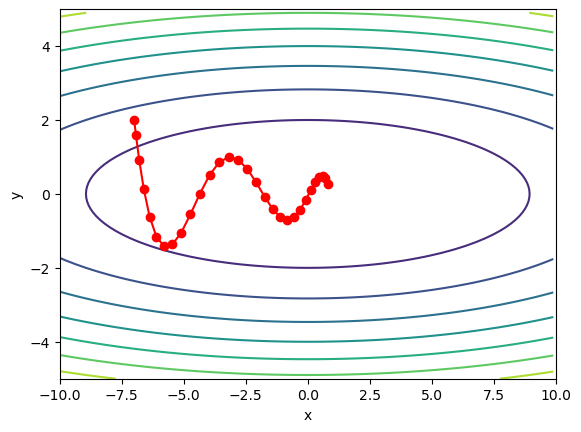

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return x**2 / 20.0 + y**2

def df(x, y):
  return x / 10.0, 2.0*y

x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 5, 0.1)

plt.figure()
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

optimizer = Momentum(lr=0.1)
params = {'x': -7.0, 'y': 2.0}
grads = {'x': 0, 'y': 0}
x_history = []
y_history = []
for i in range(30):
  x_history.append(params['x'])
  y_history.append(params['y'])
  grads['x'], grads['y'] = df(params['x'], params['y'])
  optimizer.update(params, grads)
  
plt.plot(x_history, y_history, 'o-', color='red')
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')


SGD와 비교하면 지그재그 움직임이 줄어든다.

### 6.1.5. AdaGrad

학습률 값을 정하는 효과적인 기술이다. 

매개변수의 원소마다 적응적으로 학습률을 조정한다.

$$
h \leftarrow h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}
$$

$$
W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}
$$

* $W$는 갱신할 가중치 매개변수
* $\frac{\partial L}{\partial W}$는 W에 대한 손실 함수의 기울기
* $\eta$는 학습률
* $h$는 기존 기울기 값을 제곱하여 계속 더해준다. 매개변수를 갱신할 때 $1/\sqrt{h}$를 곱해 학습률을 조정한다.
* $\odot$는 행렬의 원소별 곱을 뜻한다.

In [5]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
    
  def update(self, params, grads):
    if(self.h is None):
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
        
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

마지막 줄에서 `1e-7`을 더하는 이유는 $h$에 0이 담겨있어서 0으로 나누는 사태를 막기 위해서이다.

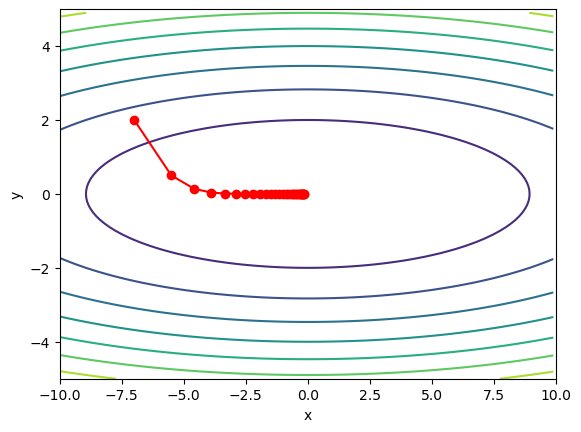

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return x**2 / 20.0 + y**2

def df(x, y):
  return x / 10.0, 2.0*y

x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 5, 0.1)

plt.figure()
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

optimizer = AdaGrad(lr=1.5)
params = {'x': -7.0, 'y': 2.0}
grads = {'x': 0, 'y': 0}
x_history = []
y_history = []
for i in range(30):
  x_history.append(params['x'])
  y_history.append(params['y'])
  grads['x'], grads['y'] = df(params['x'], params['y'])
  optimizer.update(params, grads)
  
plt.plot(x_history, y_history, 'o-', color='red')
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 6.1.6. Adam

모멘텀과 AdaGrad를 융합한 방법이다.

$$
m \leftarrow \beta_1 m + (1 - \beta_1) \frac{\partial L}{\partial W}
$$

$$
v \leftarrow \beta_2 v + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}
$$

In [7]:
class Adam:
  def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None
    
  def update(self, params, grads):
    if(self.m is None):
      self.m, self.v = {}, {}
      for key, val in params.items():
        self.m[key] = np.zeros_like(val)
        self.v[key] = np.zeros_like(val)
        
    self.iter += 1
    lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
    
    for key in params.keys():
      self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
      self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
      
      params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

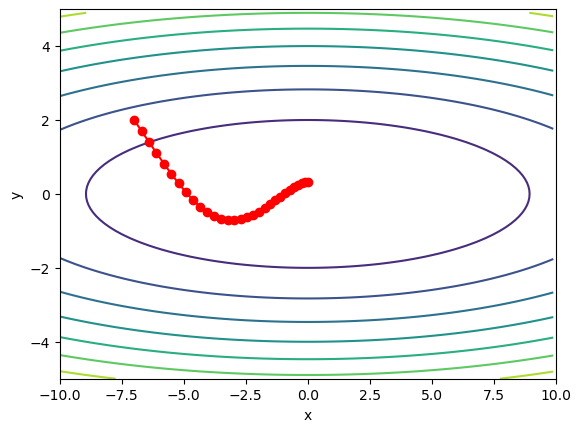

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return x**2 / 20.0 + y**2

def df(x, y):
  return x / 10.0, 2.0*y

x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 5, 0.1)

plt.figure()
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

optimizer = Adam(lr=0.3)
params = {'x': -7.0, 'y': 2.0}
grads = {'x': 0, 'y': 0}
x_history = []
y_history = []

for i in range(30):
  x_history.append(params['x'])
  y_history.append(params['y'])
  grads['x'], grads['y'] = df(params['x'], params['y'])
  optimizer.update(params, grads)
  
plt.plot(x_history, y_history, 'o-', color='red')
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6.1.7 어느 갱신 방법을 이용할 것인가?

SGD, 모멘텀, AdaGrad, Adam 등이 있다. 이 중 어떤 갱신 방법을 이용할지는 문제에 따라 다르다.

### 6.1.8. MNIST 데이터셋으로 본 갱신 방법 비교

In [9]:
# coding: utf-8
import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros_like(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

In [10]:
# coding: utf-8
import numpy as np


def smooth_curve(x):
    """損失関数のグラフを滑らかにするために用いる

    参考：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


def shuffle_dataset(x, t):
    """データセットのシャッフルを行う

    Parameters
    ----------
    x : 訓練データ
    t : 教師データ

    Returns
    -------
    x, t : シャッフルを行った訓練データと教師データ
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad

    Returns
    -------

    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [11]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=2, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict


class MultiLayerNet:
    """全結合による多層ニューラルネットワーク

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定

        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        損失関数の値
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

===========iteration:0===========
SGD:2.3440972381318015
Momentum:2.269115337073515
AdaGrad:2.1711054521228697
Adam:2.27112131428419
===========iteration:100===========
SGD:1.927227418561905
Momentum:0.33876140226966467
AdaGrad:0.14236131736841529
Adam:0.3213058039679071
===========iteration:200===========
SGD:1.0840906358589721
Momentum:0.19997978785540627
AdaGrad:0.08419309328045921
Adam:0.1805491168861456
===========iteration:300===========
SGD:0.6616399577625268
Momentum:0.30947803520031425
AdaGrad:0.12788148460534937
Adam:0.29317803919704966
===========iteration:400===========
SGD:0.5785957381235872
Momentum:0.25361104688734576
AdaGrad:0.09677035603213735
Adam:0.1669066986966835
===========iteration:500===========
SGD:0.4158775779382997
Momentum:0.16802238845623457
AdaGrad:0.07727069880530907
Adam:0.13919985046025854
===========iteration:600===========
SGD:0.4160159176503183
Momentum:0.1650867644153352
AdaGrad:0.08649982174495743
Adam:0.11129380252875536
===========iteration:700==

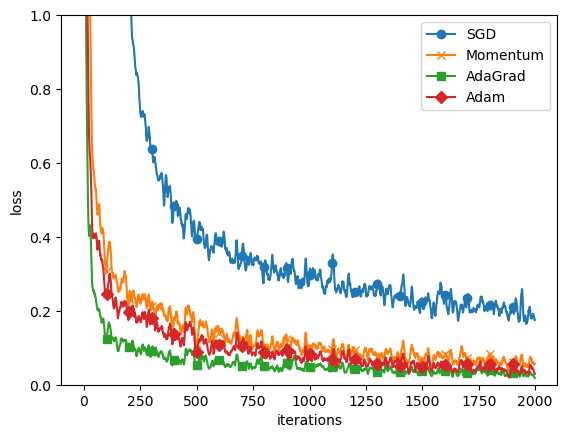

In [13]:
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

각 층의 뉴런을 100개로 한 5층 신경망을 대상으로, 각층의 활성화 함수는 ReLU를 사용한다.

결과는 다음과 같다.
* SGD의 학습 진도가 가장 느리다.
* AdaGrad가 가장 빠르게 학습한다.
* 최종적으로 AdaGrad, Adam이 가장 좋은 결과를 보인다.
* Momentum은 SGD보다 빠르게 학습하고, AdaGrad, Adam보다는 조금 뒤 뒤처진다.

## 6.2. 가중치의 초깃값

가중치의 초깃값을 어떻게 설정하느냐가 신경망 학습의 성패를 가름한다.

### 6.2.1. 초깃값을 0으로 하면?

가중치를 모두 0으로 설정하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 학습이 올바로 이뤄지지 않는다.

가중치의 초깃값은 최대한 무작위로 설정해야 한다. (가중치를 무작위로 설정하면 대칭을 무너뜨리고, 다양한 값을 시도해볼 수 있다.)

### 6.2.2. 은닉층의 활성화값 분포

은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다.

가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 살펴보자.

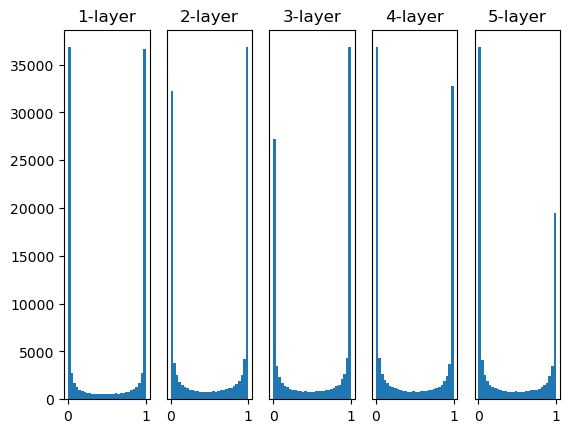

In [14]:
import numpy as np
x = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다. 시그모이드 함수는 그 출력이 0 또는 1에 가까워지면 미분이 0에 가까워지기 때문에 역전파의 기울기 값이 점점 작아지다가 사라진다. 이것을 기울기 소실(gradient vanishing)이라고 한다.

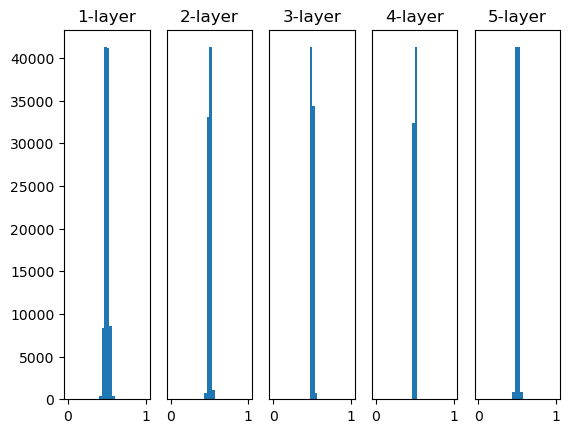

In [15]:
import numpy as np
x = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

가중치 편차를 0.01로 바꾸어보자. 활성화값이 0.5 부근에 집중되어 있어, 기울기 소실 문제는 일어나지 않지만, 활성화값이 치우쳐져 있어 표현력 관점에서는 여전히 문제가 남아있다.

**Xavier 초깃값**

각 층의 활성화값들을 광범위하게 분포시키기 위해 가중치의 초깃값을 적절히 설정해야 한다.

앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용하면 된다는 결론을 얻을 수 있었다고 한다.

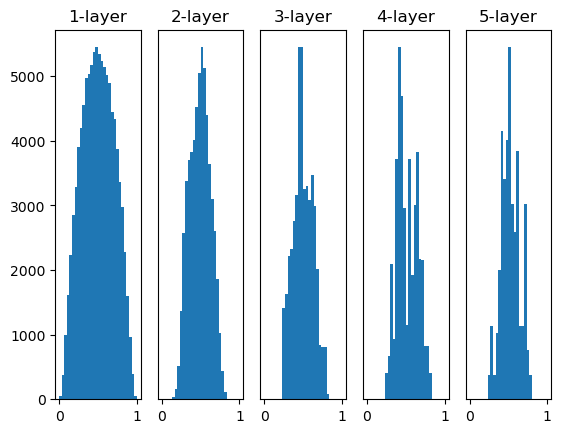

In [16]:
import numpy as np
x = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

### 6.2.3. ReLU를 사용할 때의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다. 시그모이드 함수나 하이퍼볼릭 탄젠트 함수같은 S자 모양 곡선인 활성화 함수에는 Xavier 초깃값이 효율적이다.

ReLU를 사용할 때는 He 초깃값을 사용하는 것이 좋다.

He 초깃값은 앞 계층의 노드가 n개일 때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용한다.


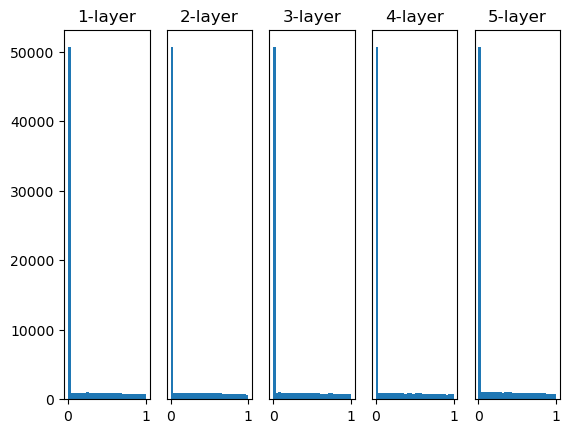

In [17]:
import numpy as np
x = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # He の初期値
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z
    
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

## 6.3. 배치 정규화

